* Referência: https://hsf-training.github.io

# Introdução


In [2]:
import numpy as np #NumPy (Numerical Python) é uma biblioteca fundamental para computação numérica em Python.

In [3]:
#import coffea

In [4]:
import uproot
import awkward as ak

In [5]:
import matplotlib.pyplot as plt
import vector
import hist
import mplhep as hep #estilos e funções específicos para a física de partículas,facilitando a criação de gráficos que seguem padrões comuns na área.

In [6]:
#Abrir o arquivo .root com o uproot
file = uproot.open('/opendata/aula-manipulando-dados/parteII/open-data-example.root')

In [7]:
file

<ReadOnlyDirectory '/' at 0x7f1b069d6870>

In [8]:
#Inspecionar o que tem no arquivo
file.keys()

['Events;1']

In [9]:
#Qual é o tipo de conteúdo do arquivo?
file.classnames()

{'Events;1': 'TTree'}

In [10]:
#Quantos branches tem no arquivo?
file['Events;1']

<TTree 'Events' (6 branches) at 0x7f1b14070bf0>

In [11]:
tree = file['Events;1']

Métodos usados para explorar o conteúdo das trees de dados.

In [12]:
# O que temos na tree? (I) (tabela)
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
nMuon                | uint32_t                 | AsDtype('>u4')
Muon_pt              | float[]                  | AsJagged(AsDtype('>f4'))
Muon_eta             | float[]                  | AsJagged(AsDtype('>f4'))
Muon_phi             | float[]                  | AsJagged(AsDtype('>f4'))
Muon_mass            | float[]                  | AsJagged(AsDtype('>f4'))
Muon_charge          | int32_t[]                | AsJagged(AsDtype('>i4'))


In [13]:
# O que temos na tree? (II) (lista)
tree.keys()

['nMuon', 'Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge']

In [14]:
#Usar o método "num_entries" para ter a informação do nr de eventos na tree

nevents = tree.num_entries

print(f"{nevents = }")



nevents = 100000


In [19]:
#número de eventos no dataset
ak.num(tree['Muon_pt'].array(), axis=0)

array(100000)

In [20]:
ak.num(tree['Muon_pt'].array(), axis=1)

<Array [2, 2, 1, 4, 4, 3, 2, 2, ..., 1, 0, 3, 2, 3, 2, 3] type='100000 * int64'>

In [16]:
tree['nMuon'].array()

<Array [2, 2, 1, 4, 4, 3, 2, ..., 1, 0, 3, 2, 3, 2, 3] type='100000 * uint32'>

*tree['nMuon'].array()* forma mais direta e eficiente de obter a contagem de múons por evento.

In [17]:
branches = tree.arrays() #
branches

<Array [{nMuon: 2, Muon_pt: [...], ...}, ...] type='100000 * {nMuon: uint32...'>

Retorna um dicionário de arrays, onde as chaves são os nomes dos branches, e os valores são arrays com os dados de cada branch.

In [23]:
branches.nMuon

<Array [2, 2, 1, 4, 4, 3, 2, ..., 1, 0, 3, 2, 3, 2, 3] type='100000 * uint32'>

In [24]:
#array regular
branches['nMuon']

<Array [2, 2, 1, 4, 4, 3, 2, ..., 1, 0, 3, 2, 3, 2, 3] type='100000 * uint32'>

In [25]:
#array irregular
branches['Muon_charge']

<Array [[-1, -1], [1, -1], ..., [...], [1, -1, 1]] type='100000 * var * int32'>

In [26]:
#array irregular
branches['Muon_pt']

<Array [[10.8, 15.7], ..., [11.4, ..., 4.97]] type='100000 * var * float32'>

In [27]:
branches.Muon_pt

<Array [[10.8, 15.7], ..., [11.4, ..., 4.97]] type='100000 * var * float32'>

O método *.array()* transforma o branch em um awkward array.

Você está acessando o branch Muon_pt da tree e convertendo seu conteúdo em um array que pode ser manipulado em Python.

In [28]:
tree['Muon_pt'].array() 

<Array [[10.8, 15.7], ..., [11.4, ..., 4.97]] type='100000 * var * float32'>

In [29]:
#array irregular
branches.Muon_eta

<Array [[1.07, -0.564], ..., [0.444, ..., 0.764]] type='100000 * var * float32'>

Selecionando o primeiro evento no branch Muon_eta

In [30]:
branches['Muon_eta'][0]

<Array [1.07, -0.564] type='2 * float32'>

In [38]:
#Para acessar o valor de eta do primeiro múon no primeiro evento
branches['Muon_eta'][0][0]

np.float32(1.0668273)

In [31]:
branches['Muon_eta'][1]

<Array [-0.428, 0.349] type='2 * float32'>

In [39]:
branches['Muon_eta'][1][0]

np.float32(-0.42778006)

In [32]:
for i in range(5):
    print(branches['Muon_eta'][i])

[1.07, -0.564]
[-0.428, 0.349]
[2.21]
[-1.59, -1.75, -1.59, -1.66]
[-2.17, -2.18, -1.12, -1.16]


O *hist.axis.Regular* é um método da biblioteca hist usado para definir um eixo com intervalos regulares em um histograma. Ele permite especificar o número de bins, o intervalo de valores, e o título para o eixo.

hist.axis.Regular(nbins, start, stop, label="Axis Label")


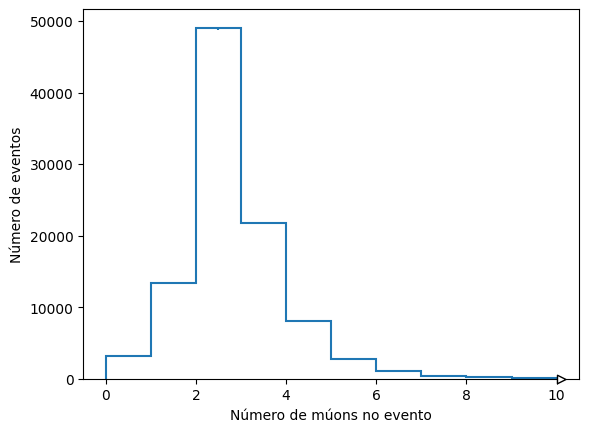

In [40]:
hnm = hist.Hist(hist.axis.Regular(10, 0, 10, label='Número de múons no evento'))
hnm.fill((branches['nMuon']))
hnm.plot()
plt.ylabel('Número de eventos')
plt.show()

# Contando eventos

Podemos contar o nr de eventos usando a função do python *len()*, usada para retornar o comprimento (número de itens) de um objeto.

In [41]:
len(branches)

100000

In [42]:
len(branches['nMuon'])


100000

In [43]:
len(branches['Muon_pt']) # com qualquer branches

100000

Usando o Awkawrd com *ak.num*

In [44]:
ak.num(branches['Muon_pt'])

<Array [2, 2, 1, 4, 4, 3, 2, 2, ..., 1, 0, 3, 2, 3, 2, 3] type='100000 * int64'>

In [46]:
len(ak.flatten(branches['Muon_pt'])) #nr de múons

235286

# Aplicar critérios de seleção 

In [47]:
branches['nMuon'] == 1

<Array [False, False, True, ..., False, False, False] type='100000 * bool'>

In [49]:
single_muon_mask = branches['nMuon'] == 1

Essa máscara pode ser aplicada a outros arrays para filtrar dados, selecionando apenas os eventos com um múon.

Contar o nr de eventos selecionados:

In [50]:
np.sum(single_muon_mask)

np.int64(13447)

In [51]:
print(len(single_muon_mask)) #retorna o número total de eventos no array
print(np.sum(single_muon_mask)) # soma todos os valores True no array single_muon_mask

100000
13447


Se quisermos aplicar uma seleção em um array (ou seja, remover eventos ou múons que não passam), basta usar a máscara de seleção como um índice. Por exemplo, se queremos o pT apenas daqueles múons em eventos com exatamente um múon:

In [52]:
branches['Muon_pt'][single_muon_mask]

<Array [[3.28], [3.84], ..., [13.3], [9.48]] type='13447 * var * float32'>

Podemos verificar que estamos realmente observando apenas os eventos que passam pela seleção ao conferir o número de linhas:

In [53]:
len(branches['Muon_pt'][single_muon_mask])

13447

Plotando com Seleções - podemos usar máscaras para plotar quantidades após alguma seleção. 


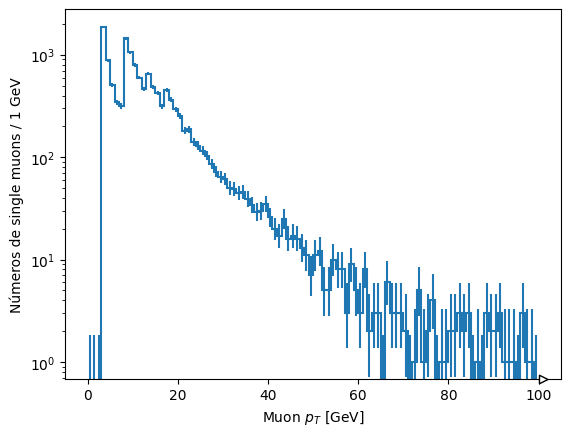

In [54]:
h = hist.Hist(hist.axis.Regular(100, 0, 100, label='Muon $p_{T}$ [GeV]'))
h.fill(np.ravel(branches['Muon_pt'][single_muon_mask]))
h.plot()
plt.yscale('log')
plt.ylabel('Números de single muons / 1 GeV')
plt.show()

Vamos analisar uma comparação para um array irregular (jagged array), usando o valor absoluto de $\eta$ dos múons:

In [55]:
eta_mask = abs(branches['Muon_eta']) < 2
eta_mask

<Array [[True, True], ..., [True, True, True]] type='100000 * var * bool'>

Novamente, o array de máscara tem as mesmas dimensões que o array original. Há um valor booleano para cada múon, correspondendo a se o seu $\eta$  é menor que 2 em valor absoluto. 

Podemos realizar contagens e plotagens da mesma forma que antes:

In [56]:
np.sum(eta_mask)

np.int64(204564)

Esse é o nr de múons que passam pelo corte ou seleção.

In [57]:
eta_hist = hist.Hist(hist.axis.Regular(50, -2.5, 2.5, label=r'Muon $\eta$'))

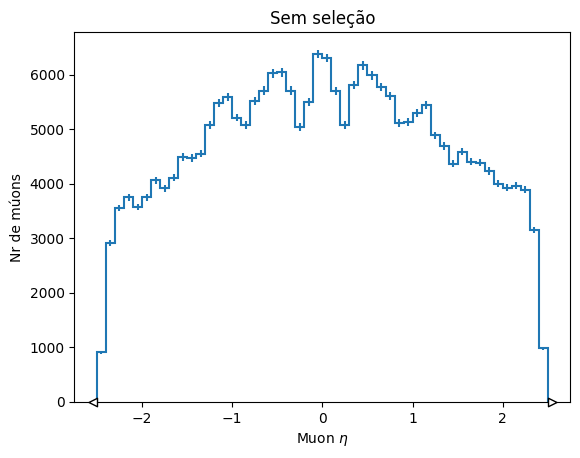

In [58]:
eta_hist.fill(np.ravel(branches['Muon_eta']))
eta_hist.plot()
plt.title('Sem seleção')
plt.ylabel('Nr de múons')
plt.show()

In [62]:
#print(eta_hist)


In [59]:
eta_hist.reset() # Remove todos os dados preenchidos, mas mantém a estrutura. Limpa ou zera.


Hist(Regular(50, -2.5, 2.5, label='Muon $\\eta$'), storage=Double())

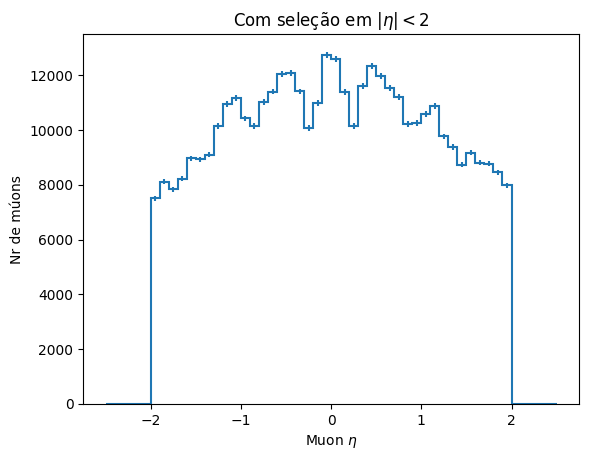

In [64]:
eta_hist.fill(np.ravel(branches['Muon_eta'][eta_mask]))
eta_hist.plot()
plt.title(r'Com seleção em $|\eta| < 2$')
plt.ylabel('Nr de múons')
plt.show()

O *np.ravel* é uma função da biblioteca *NumPy* usada para "achatar" um array, convertendo um array multidimensional em um array unidimensional. É mais eficiente em termos de memória, pois tenta evitar a criação de uma nova cópia dos dados.

Agora, podemos usar essas operações para comparar distribuições para diferentes seleções. Vamos observar o pT de múons em eventos únicos, divididos em dois grupos: aqueles com $|\eta| < 2$ e aqueles com $|\eta| \geq 2$. Tudo o que precisamos fazer é fornecer uma lista de arrays como o primeiro argumento para o histograma, em vez de apenas um array. Observe os colchetes ao redor dos dois arrays:

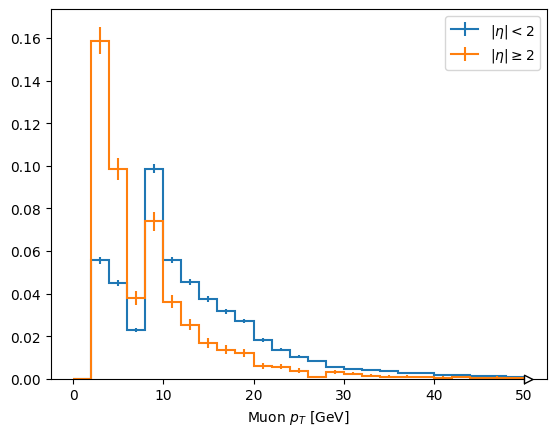

In [66]:
pt_hist = hist.Hist(hist.axis.Regular(25, 0, 50, label='Muon $p_{T}$ [GeV]'),
                    hist.axis.StrCategory([], growth=True, name='category'))

pt_hist.fill(np.ravel(branches['Muon_pt'][single_muon_mask & eta_mask]), category=r'$|\eta| < 2$')
pt_hist.fill(np.ravel(branches['Muon_pt'][single_muon_mask & ~eta_mask]), category=r'$|\eta| \geq 2$')
pt_hist.plot(density=True) #Plota o histograma normalizado, onde a área total é igual a 1 (se density=True).
plt.legend()
plt.show()

*hist.axis.StrCategory([], growth=True, name='category')* : Define um eixo de categorias que pode crescer dinamicamente (com growth=True) conforme novas categorias são adicionadas. Isso permite separar as seleções de eta em diferentes categorias.

Agora, podemos ver claramente que há uma fração maior de múons com $|\eta| \geq 2$ em valores mais baixos de pT em comparação com múons com $|\eta| < 2$. Isso faz sentido geometricamente, pois múons com valores mais altos de 
$|\eta|$ estão viajando em uma direção menos perpendicular ao feixe.

Como resultado, seu pT tende a ser menor, já que esses múons estão se movendo mais ao longo da direção do feixe do que na direção perpendicular a ele.

# Verificaremos o perfil dos eventos de Dimuons

In [67]:
two_muons_mask = branches['nMuon'] == 2

In [68]:
muon_p4 = vector.zip({'pt': branches['Muon_pt'], 
                      'eta': branches['Muon_eta'],
                      'phi': branches['Muon_phi'], 
                      'mass': branches['Muon_mass']})

In [69]:
two_muons_p4 = muon_p4[two_muons_mask]

In [70]:
two_muons_p4

<MomentumArray4D [[{rho: 10.8, phi: ..., ...}, ...], ...] type='48976 * var...'>

two_muons_p4.pt

two_muons_p4.eta

two_muons_p4.phi

two_muons_p4.E

two_muons_p4.mass

In [71]:
first_muon_p4 = two_muons_p4[:, 0]

Na notação [:, 0], o : significa "incluir todas as linhas na primeira dimensão" (ou seja, todos os eventos no array). A vírgula separa a seleção ao longo da primeira dimensão da seleção ao longo da segunda dimensão. A segunda dimensão representa os múons em cada evento, então, ao usarmos 0, estamos selecionando o primeiro múon em cada evento.

In [72]:
second_muon_p4 = two_muons_p4[:, 1]

In [73]:
sum_p4 = first_muon_p4 + second_muon_p4
sum_p4

<MomentumArray4D [{rho: 8.79, phi: 1.83, ...}, ...] type='48976 * Momentum4...'>

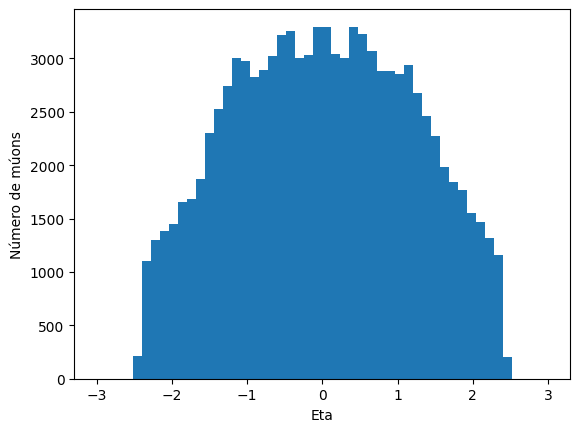

In [76]:
# Acessando eta e plotando
eta_values = np.ravel(two_muons_p4.eta)  
plt.hist(eta_values, bins=50, range=(-3, 3))
plt.xlabel('Eta')
plt.ylabel('Número de múons')
plt.show()

In [74]:
two_muons_charges = branches['Muon_charge'][two_muons_mask]
opposite_sign_muons_mask = two_muons_charges[:, 0] != two_muons_charges[:, 1]

In [77]:
dimuon_p4 = sum_p4[opposite_sign_muons_mask]

O comando *hist.axis.Variable(np.logspace(-1, 3, 200)* define o eixo x do histograma com bins variáveis usando np.logspace.

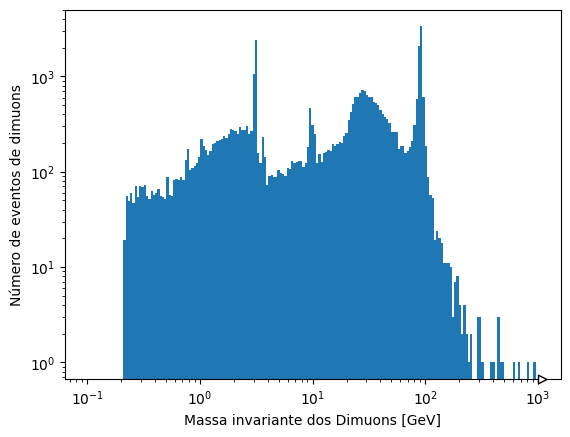

In [79]:
dimuon_mass_hist = hist.Hist(hist.axis.Variable(np.logspace(-1, 3, 200), label='Massa invariante dos Dimuons [GeV]'))
dimuon_mass_hist.fill(dimuon_p4.mass)
hep.histplot(dimuon_mass_hist, histtype='fill')
plt.xscale('log')
plt.ylabel('Número de eventos de dimuons')
plt.yscale('log')

In [80]:
len(dimuon_p4) #Conta o número de pares de múons com sinais opostos

37183

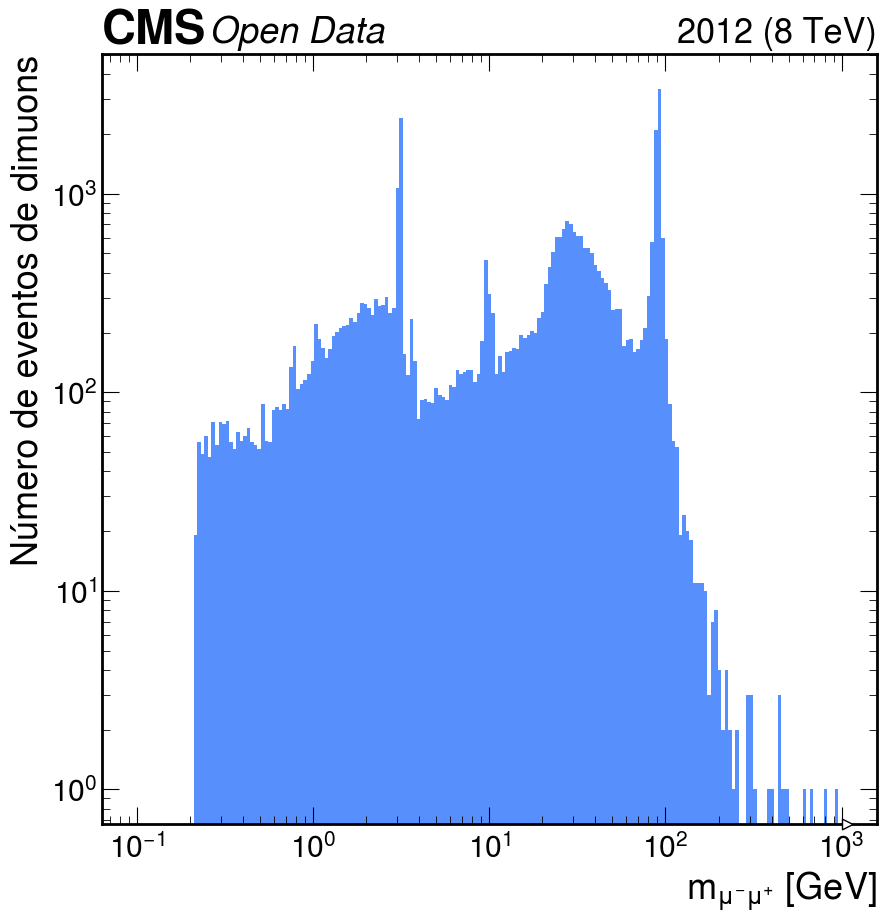

In [81]:
dimuon_mass_hist = hist.Hist(hist.axis.Variable(np.logspace(-1, 3, 200), label=r'$m_{\mu^{-}\mu^{+}}$ [GeV]'))
dimuon_mass_hist.fill(dimuon_p4.mass)
hep.style.use('CMS')
hep.histplot(dimuon_mass_hist, histtype='fill')
hep.cms.label(data=True, label='Open Data', year=2012, com=8)
plt.xscale('log')
plt.ylabel('Número de eventos de dimuons')
plt.yscale('log')